In [2]:
import numpy as np
np.random.seed(42)
m = 100
X = 10 * np.random.rand(m, 1) - 5
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1) #polynomial data set with some gaussian noise
n = 2 #polynomial degree

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=n, include_bias=False) #class to transform polynomial into one of degree 2
X_poly = poly_features.fit_transform(X) # takes the each value in vector X as the input x, calculates X^2 and X to make quadratic
X[0]
X_poly[0] # == (X, X^2)

array([-1.25459881,  1.57401818])

# Linear Regression (for reference)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.49786712]), array([[0.99661546, 0.49988197]]))

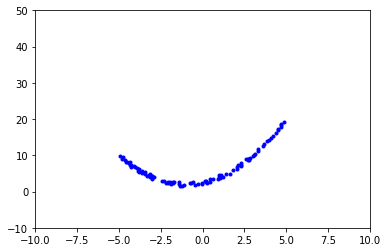

In [6]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
for i in range(-10, 10):
    predict_poly_features = PolynomialFeatures(degree=n, include_bias=False)
    predict_poly = predict_poly_features.fit_transform([[i]])
    valueVec = np.full((1, n), i) #creates an n x 1 array of value i
    plt.plot(valueVec, lin_reg.predict(predict_poly), "r-")
plt.axis([-10, 10, -10, 50])
plt.show()

In [97]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y)
lasso_reg.intercept_, lasso_reg.coef_

(array([2.5148711]), array([0.98458319, 0.49755531]))

# Lasso Regression version

In [110]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=5)
lasso_reg.fit(X_poly, y)
lasso_reg.intercept_, lasso_reg.coef_

(array([3.34806557]), array([0.39501116, 0.38354928]))

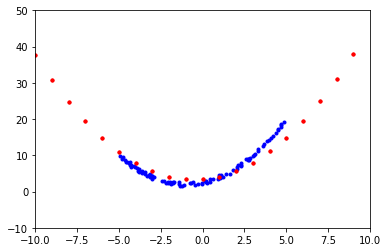

In [111]:
plt.plot(X, y, "b.")
for i in range(-10, 10):
    predict_poly_features = PolynomialFeatures(degree=n, include_bias=False)
    predict_poly = predict_poly_features.fit_transform([[i]])
    valueVec = np.full((1, n), i) #creates an n x 1 array of value i
    plt.plot(valueVec, lasso_reg.predict(predict_poly), "r.")
plt.axis([-10, 10, -10, 50])
plt.show()